# Part 2 for Excersie 4.9 and import most recent dataframe

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r"C:\Users\toloz\Instacart Basket Analysis 9_11_2024"

In [5]:
# Import most up-to-date dataframe
ords_prods_customers_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_merged.pkl'))

In [6]:
# I alrady have done, I will send in a different!: 
#Step 3
#If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

# Step 4 You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

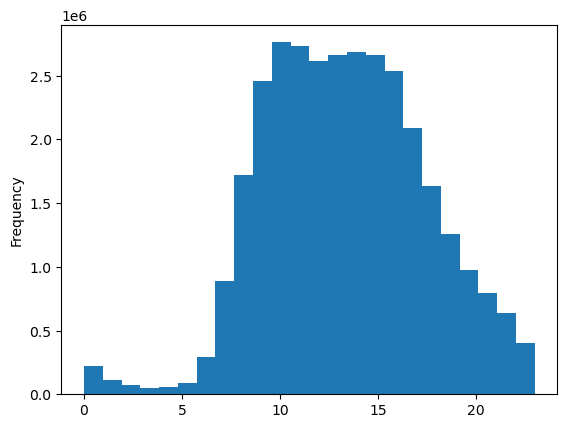

In [8]:
hist = ords_prods_customers_merged['order_hour_of_day'].plot.hist(bins = 24)

The histogram reveals peaks between 7 and 15, indicating that the most orders are placed during these hours. This suggests that customers prefer to shop during morning and early afternoon hours.

The shape of the distribution resembles a bell curve, suggesting a fairly normal distribution. This implies that there is a consistent pattern of shopping behavior, with most orders occurring in the middle of the day. There are fewer orders placed during the early morning and late evening hours. Analyzing this distribution helps to better understand customer behavior, which can be used to optimize strategies, such as marketing or inventory management, during high-demand hours.

# Step 4 The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

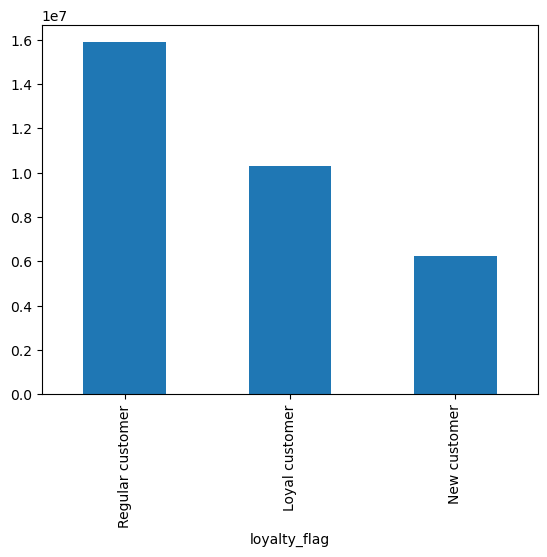

In [11]:
bar = ords_prods_customers_merged['loyalty_flag'].value_counts().plot.bar()

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'loyalty_flag.png'))

# Step 5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [26]:
# Create a random sample by generating a seed
np.random.seed(4)

In [28]:
# Create a dev list based on the data split we want (70/30)
dev_list = np.random.rand(len(ords_prods_customers_merged)) <= 0.7

In [30]:
# Split the dataframe into two samples
big = ords_prods_customers_merged[dev_list]
small = ords_prods_customers_merged[~dev_list]

In [32]:
# Compare the dataframe length to the sum of the big and small samples
len(ords_prods_customers_merged)

32404859

In [34]:
len(big) + len(small)

32404859

In [36]:
# Reduce the samples to only the columns needed
ords_prods_customers_merged_2 = small [['order_hour_of_day','prices']]

In [40]:
ords_prods_customers_merged_2.head(10)

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
12,7,4.4
13,12,4.4
19,16,4.4
21,8,4.7
22,7,4.7


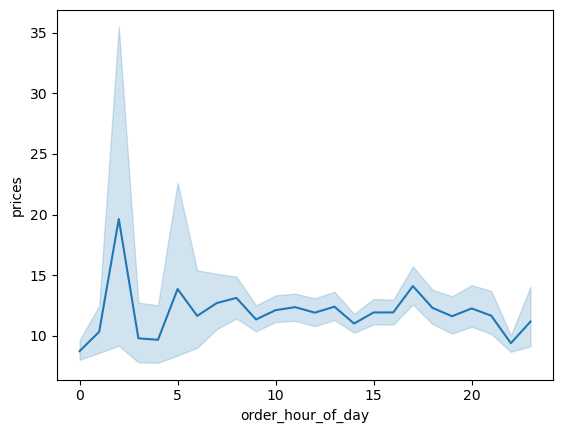

In [42]:
# Create a line chart
line = sns.lineplot(data = ords_prods_customers_merged_2, x = 'order_hour_of_day',y = 'prices')

# Step 6 Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [45]:
# Reduce previously made sample to only the columns needed
ords_prods_customers_merged_3 = small [['age','n_dependants']]

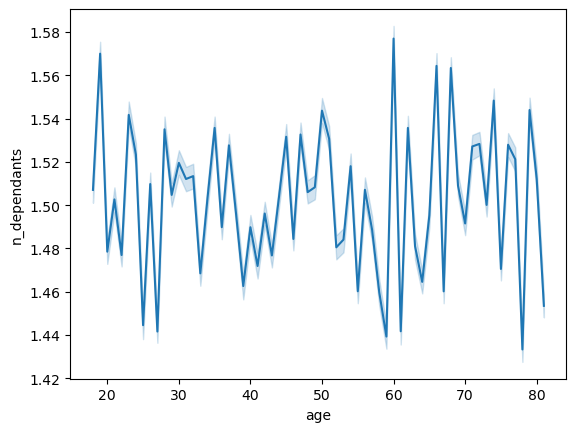

In [55]:
line_2 = sns.lineplot(data = ords_prods_customers_merged_3, x = 'age',y = 'n_dependants')

The line graph displays fluctuations in the number of dependents across different ages, 
without a clear or consistent pattern. While there are some peaks around ages 30, 60, and 70, and drops near ages 20 and 80,
there is no obvious upward or downward trend as age increases. This suggests that there is no strong correlation between age and the number of dependents, as the values seem to vary randomly across the age range.

# Step 7 You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [59]:
# Reduce previously made sample to only the columns needed
ords_prods_customers_merged_4 = small [['age','income']]

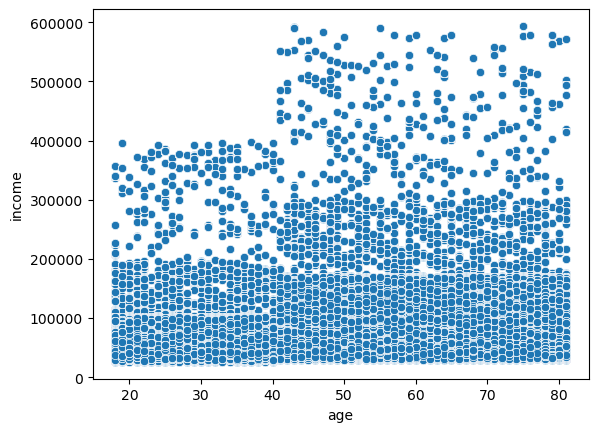

In [61]:
# Create a scatterplot
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_customers_merged_4)

The scatterplot shows the relationship between age and income. There appears to be a broad range of incomes across all age groups, but higher income levels are more concentrated in individuals aged 40 and above. Below age 40, income seems to be capped at around 300,000, while those aged 40 and older display more variability, with some individuals earning significantly higher incomes.

In summary, the plot suggests that income generally increases with age, especially after age 40, although the spread of incomes at each age remains quite large.

# Step 8 Export your visualizations as “.png” files in your relevant project folder.

In [71]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'hist_order_hour_of_day_frequency.png'))

In [73]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'loyalty_flag_distribution.png'))

In [75]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'price_fluctuations_by_hour.png'))

In [79]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'age_vs_n_dependants.png'))

In [81]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualitations', 'change_in_spending_power_over_age.png'))